<a href="https://colab.research.google.com/github/kellyz04/Text-Analytics/blob/master/Text_final_project_version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.0MB/s 
     |████████████████████████████████| 552kB 33.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=67870e1603c7c62f6e15c46f65cf43c1f1d22691ab6e74acbdf5eaa1d7a083e8
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32040 sha256=4c3d6e1082828d182667f55e0d511858aa794aa3f49b389b403800fb5134d0b4
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import re # We clean text using regex
import csv # To read the csv
from collections import defaultdict # For accumlating values
from nltk.corpus import stopwords # To remove stopwords
from gensim import corpora # To create corpus and dictionary for the LDA model
from gensim.models import LdaModel # To use the LDA model
import pyLDAvis.gensim # To visualise LDA model effectively
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
Four_Seasons = pd.read_csv('/content/drive/My Drive/Text Analysis Project/Final Project/Downtown Hotels/Four_Seasons_reviews.csv')
Hilton = pd.read_csv('/content/drive/My Drive/Text Analysis Project/Final Project/Downtown Hotels/Hilton_reviews.csv')
Hotel_ZaZa = pd.read_csv('/content/drive/My Drive/Text Analysis Project/Final Project/Downtown Hotels/Hotel_ZaZa_Austin_reviews.csv')
InterContinental = pd.read_csv('/content/drive/My Drive/Text Analysis Project/Final Project/Downtown Hotels/InterContinental_reviews.csv')
JW_Marriott = pd.read_csv('/content/drive/My Drive/Text Analysis Project/Final Project/Downtown Hotels/JW_Marriott_reviews.csv')
Kimpton_Hotel_Van_Zandt = pd.read_csv('/content/drive/My Drive/Text Analysis Project/Final Project/Downtown Hotels/Kimpton_Hotel_Van_Zandt_reviews.csv')
Omni = pd.read_csv('/content/drive/My Drive/Text Analysis Project/Final Project/Downtown Hotels/Omni_Austin_Hotel_Downtown-Austin_reviews.csv')
The_Driskill = pd.read_csv('/content/drive/My Drive/Text Analysis Project/Final Project/Downtown Hotels/The_Driskill_reviews.csv')
Westin = pd.read_csv('/content/drive/My Drive/Text Analysis Project/Final Project/Downtown Hotels/The_Westin_Austin_Downtown_reviews.csv')
W_Austin = pd.read_csv('/content/drive/My Drive/Text Analysis Project/Final Project/Downtown Hotels/W_Austin_reviews.csv')

In [0]:
# Four_Seasons = pd.read_csv('Downtown Hotels/Four_Seasons_reviews.csv')
# Hilton = pd.read_csv('Downtown Hotels/Hilton_reviews.csv')
# Hotel_ZaZa = pd.read_csv('Downtown Hotels/Hotel_ZaZa_Austin_reviews.csv')
# InterContinental = pd.read_csv('Downtown Hotels/InterContinental_reviews.csv')
# JW_Marriott = pd.read_csv('Downtown Hotels/JW_Marriott_reviews.csv')
# Kimpton_Hotel_Van_Zandt = pd.read_csv('Downtown Hotels/Kimpton_Hotel_Van_Zandt_reviews.csv')
# Omni = pd.read_csv('Downtown Hotels/Omni_Austin_Hotel_Downtown-Austin_reviews.csv')
# The_Driskill = pd.read_csv('Downtown Hotels/The_Driskill_reviews.csv')
# Westin = pd.read_csv('Downtown Hotels/The_Westin_Austin_Downtown_reviews.csv')
# W_Austin = pd.read_csv('Downtown Hotels/W_Austin_reviews.csv')

In [0]:
Four_Seasons['hotel'] = 'Four_Seasons'
Hilton['hotel'] = 'Hilton'
Hotel_ZaZa['hotel'] = 'Hotel_ZaZa'
InterContinental['hotel'] = 'InterContinental'
JW_Marriott['hotel'] = 'InterContinental'
Kimpton_Hotel_Van_Zandt['hotel'] = 'Kimpton_Hotel_Van_Zandt'
Omni['hotel'] = 'Omni'
The_Driskill['hotel'] = 'The_Driskill' 
Westin['hotel'] = 'Westin'
W_Austin['hotel'] = 'W_Austin'

In [0]:
downtown_reviews = pd.concat([Four_Seasons,
Hilton,
Hotel_ZaZa,
InterContinental,
JW_Marriott,
Kimpton_Hotel_Van_Zandt,
Omni,
The_Driskill,
Westin,
W_Austin])

In [0]:
downtown_reviews.head()

,rating,title,review,hotel
0,5,"Excellent, but pricey","The service, the rooms, and the common spaces ...",Four_Seasons
1,5,Four Seasons - Austin,Great place to stay in Austin. Great facility ...,Four_Seasons
2,5,Four Seasons Halloween Wedding Stay,I cannot say enough about how wonderful the st...,Four_Seasons
3,5,Awesome customer service!,The team at this hotel is awesome. Even when y...,Four_Seasons
4,5,"Beautiful, classy & comfortable.",Our 9:30 PM flight from NY to Austin was delay...,Four_Seasons


In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
reviews = downtown_reviews['review']

In [0]:
# remove short words (length < 3)
reviews = reviews.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [0]:
#remove punctuations
reviews = [re.sub(r'[^\w\s]','',str(item)) for item in reviews]

In [0]:
#remove stopwords
stopwords = set(stopwords.words('english'))
texts = [[word for word in document.lower().split() if word not in stopwords] for document in reviews]

In [0]:
#Take out infrequent words
frequency = defaultdict(int)
for text in texts:
    for token in text:
         frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

## Begin Analysis 

In [0]:
dictionary = corpora.Dictionary(texts)

In [0]:
print(dictionary)

In [0]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [0]:
NUM_TOPICS = 5 
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

In [0]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)

In [0]:
word_dict = {};
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

### Topic1: Great location and nice staff
### Topic2: Staying one night in the hotel room
### Topic3: Great Service and good experience
### Topic4: Pool, bathroom, shower
### Topic5: Front desk service

In [0]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

## What are negative reviews talking about?

In [0]:
downtown_reviews.head()

In [0]:
neg_reviews = downtown_reviews[downtown_reviews['rating']<4]['review']

In [0]:
len(neg_reviews)

In [0]:
# remove short words (length < 3)
neg_reviews = neg_reviews.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [0]:
#remove punctuations
neg_reviews = [re.sub(r'[^\w\s]','',str(item)) for item in neg_reviews]

In [0]:
#remove stopwords
#stopwords = set(stopwords.words('english'))
texts = [[word for word in document.lower().split() if word not in stopwords] for document in neg_reviews]

In [0]:
#Take out infrequent words
frequency = defaultdict(int)
for text in texts:
    for token in text:
         frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

In [0]:
dictionary = corpora.Dictionary(texts)

In [0]:
print(dictionary)

In [0]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [0]:
NUM_TOPICS = 4
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

In [0]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)

In [0]:
word_dict = {};
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

### Topic1: Great location and nice staff
### Topic2: Staying one night in the hotel room
### Topic3: Great Service and good experience
### Topic4: Pool, bathroom, shower
### Topic5: Front desk service

In [0]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

# Sentiment Analysis


In [0]:
!pip install lda

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
import nltk
import lda
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [0]:
sia = SentimentIntensityAnalyzer()

In [0]:
df= downtown_reviews.copy().reset_index()

In [0]:
def remove(word,df):
  for i in range(len(df)):
    df[i] = df[i].lower()
    if word in df[i]:
      df[i] = df[i].replace(word, '')
    else:
      pass
  return df
def filter_word(comment):
    stop_words = set(stopwords.words('english'))
    word = re.findall(r'\w+',comment)
    filtered_sentence = ''
    for w in word: 
        if w.lower() not in stop_words: 
            filtered_sentence +=' '
            filtered_sentence += w    
    return filtered_sentence

In [0]:
remove('hotel',df['review'])
remove('austin',df['review'])
for i in range(len(df['review'])):
  df['review'][i] = filter_word(df['review'][i])

In [0]:
df['neg'] = df['review'].apply(lambda x:sia.polarity_scores(x)['neg'])
df['neu'] = df['review'].apply(lambda x:sia.polarity_scores(x)['neu'])
df['pos'] = df['review'].apply(lambda x:sia.polarity_scores(x)['pos'])
df['compound'] = df['review'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [0]:
df.head()
df.groupby(["hotel"]).mean()

,index,rating,neg,neu,pos,compound
hotel,,,,,,
Four_Seasons,249.500000,4.598000,0.031466,0.585606,0.382902,0.836646
Hilton,249.500000,4.242000,0.045396,0.596372,0.358234,0.811546
Hotel_ZaZa,14.500000,4.733333,0.039567,0.576467,0.383867,0.915907
InterContinental,247.025253,4.529293,0.033797,0.564395,0.401804,0.841697
Kimpton_Hotel_Van_Zandt,249.500000,4.326000,0.039244,0.575868,0.384864,0.858199
Omni,249.500000,3.984000,0.054620,0.599592,0.345768,0.715775
The_Driskill,249.500000,4.312000,0.044322,0.580044,0.375624,0.817169
W_Austin,249.500000,4.306000,0.039044,0.583004,0.377960,0.880431
Westin,249.500000,4.428000,0.041412,0.562134,0.396438,0.818872


In [0]:
pos_rev = df[df['compound']>0.2]['review']
# neu_rev = df[df['compound']<= 0.2 and df['compound']>= -0.2]['review']
neg_rev = df[df['compound']< -0.1]['review']

In [0]:
len(pos_rev)/len(df['review']),len(neg_rev)/len(df['review'])

(0.9378318584070796, 0.04336283185840708)

# A very quick topic modeling

### positive reviews


In [0]:
w_token=RegexpTokenizer(r'\w+')
w_lemma = WordNetLemmatizer()
stop =set(stopwords.words('english'))

def tokenize(version_desc):
    text = w_lemma.lemmatize(version_desc.lower())
    tokens = w_token.tokenize(text)
    return tokens

vec = CountVectorizer(tokenizer=tokenize, stop_words=stop, decode_error='ignore')
words = vec.fit_transform(pos_rev)

model = lda.LDA(n_topics = 3, n_iter = 500, random_state = 1)
model.fit(words)

In [0]:
topic_word = model.topic_word_
df_topic = pd.DataFrame(model.doc_topic_)
df_new = df.join(df_topic)

In [0]:
df_pos = pd.DataFrame()
for i in range(3):
    topic = str(i)
    df_pos[topic]=df_new.groupby(["review"])[i].mean()

df_pos = df_pos.reset_index()
topics = pd.DataFrame(topic_word)
topics.columns = vec.get_feature_names()
topics = topics.T

In [0]:
topics.sort_values(0, ascending=False).head(10)  #乱糟糟

,0,1,2
great,0.027501,1.648181e-07,0.017503
location,0.015779,1.648181e-07,0.005094
staff,0.015523,1.648181e-07,0.023248
nice,0.014541,4.713963e-03,0.001915
room,0.013228,3.207377e-02,0.008522
rooms,0.012488,2.670218e-03,0.004424
bar,0.011646,1.648181e-07,0.003466
stay,0.011531,4.120618e-03,0.018078
pool,0.010421,2.670218e-03,0.002317
service,0.009682,1.895573e-03,0.015856


In [0]:
topics.sort_values(1, ascending=False).head(10) #房间 maybe

,0,1,2
room,1.322752e-02,0.032074,8.521841e-03
would,5.484966e-03,0.008785,4.232291e-03
one,2.372639e-03,0.008175,6.166418e-03
get,1.760378e-03,0.008027,9.959797e-04
night,3.240009e-03,0.007878,3.006706e-03
us,1.275544e-07,0.006247,9.843175e-03
could,8.674973e-04,0.006115,2.010918e-03
parking,1.492514e-03,0.005373,1.914977e-07
like,2.449171e-03,0.005340,3.504600e-03
day,1.046073e-03,0.005274,2.355614e-03


In [0]:
topics.sort_values(2, ascending=False).head(10) #服务

,0,1,2
staff,1.552349e-02,1.648181e-07,0.023248
stay,1.153104e-02,4.120618e-03,0.018078
great,2.750085e-02,1.648181e-07,0.017503
service,9.681504e-03,1.895573e-03,0.015856
us,1.275544e-07,6.246772e-03,0.009843
room,1.322752e-02,3.207377e-02,0.008522
experience,1.964465e-03,1.648181e-07,0.008120
time,3.418585e-03,3.988763e-03,0.007947
front,9.312745e-04,3.181155e-03,0.007449
made,6.761657e-04,7.253646e-04,0.007124


### neg review topics


In [0]:
w_token=RegexpTokenizer(r'\w+')
w_lemma = WordNetLemmatizer()
stop =set(stopwords.words('english'))

def tokenize(version_desc):
    text = w_lemma.lemmatize(version_desc.lower())
    tokens = w_token.tokenize(text)
    return tokens

vec = CountVectorizer(tokenizer=tokenize, stop_words=stop, decode_error='ignore')
words = vec.fit_transform(neg_rev)

model = lda.LDA(n_topics = 3, n_iter = 500, random_state = 1)
model.fit(words)

topic_word = model.topic_word_
df_topic = pd.DataFrame(model.doc_topic_)
df_newn= df.join(df_topic)

df_neg = pd.DataFrame()
for i in range(3):
    topic = str(i)
    df_neg[topic]=df_newn.groupby(["review"])[i].mean()

df_neg = df_neg.reset_index()
topics_neg = pd.DataFrame(topic_word)
topics_neg.columns = vec.get_feature_names()
topics_neg = topics_neg.T

In [0]:
topics_neg.sort_values(0, ascending=False).head(10) #rooms?

,0,1,2
room,0.022134,0.000003,0.043861
service,0.016865,0.000003,0.000003
staff,0.013439,0.000003,0.000003
would,0.012122,0.010738,0.000003
rooms,0.011595,0.005669,0.000003
stay,0.009751,0.007756,0.010885
never,0.008697,0.006563,0.000003
stayed,0.008434,0.000003,0.000003
one,0.008434,0.000003,0.011545
also,0.008170,0.000003,0.000003


In [0]:
topics_neg.sort_values(1, ascending=False).head(10) #staff

,0,1,2
check,0.000003,0.016105,0.000003
desk,0.000003,0.014913,0.000003
day,0.000003,0.013720,0.000003
told,0.000003,0.012825,0.000003
front,0.000003,0.012229,0.000003
manager,0.000003,0.011036,0.000003
would,0.012122,0.010738,0.000003
back,0.000003,0.010440,0.000003
said,0.000003,0.009545,0.000003
called,0.000003,0.009545,0.000003


In [0]:
topics_neg.sort_values(2, ascending=False).head(10) #noise

,0,1,2
room,0.022134,0.000003,0.043861
night,0.000003,0.000003,0.026054
one,0.008434,0.000003,0.011545
stay,0.009751,0.007756,0.010885
experience,0.000003,0.000301,0.008907
worst,0.000003,0.000003,0.008907
made,0.001320,0.000003,0.008907
four,0.000003,0.000003,0.008907
noise,0.000003,0.000003,0.008577
got,0.000003,0.000003,0.008577


# Frequency/  Brand Lift


In [0]:
def filter_word(comment):
    stop_words = set(stopwords.words('english'))
    word = re.findall(r'\w+',comment)
    filtered_sentence = ''
    for w in word: 
        if w.lower() not in stop_words: 
            filtered_sentence +=' '
            filtered_sentence += w    
    return filtered_sentence

def word_count(comment): 
    word_dict = {}
    word = re.findall(r'\w+',comment)
    for j in word:
        if j not in word_dict:
            word_dict[j] = 1
    return word_dict

In [0]:
outer_dict = {}
for i in pos_rev:
    inner_dict = {}
    i = i.lower() 
    filter_comment = filter_word(i)
    inner_dict = word_count(filter_comment)
    for key, value in inner_dict.items():
        if key not in outer_dict:
            outer_dict[key] = 1
        else:
            outer_dict[key] += 1

In [0]:
pos_word_freq = pd.DataFrame(data = outer_dict,index=['freq'])
pos_word_freq.T.sort_values(by='freq',ascending=False)[:100]
pos_word_freq.T.to_csv("pos_word_freq.csv", sep=",")

In [0]:
outer_dict_neg = {}
for i in neg_rev:
    inner_dict = {}
    i = i.lower() 
    filter_comment = filter_word(i)
    inner_dict = word_count(filter_comment)
    for key, value in inner_dict.items():
        if key not in outer_dict_neg:
            outer_dict_neg[key] = 1
        else:
            outer_dict_neg[key] += 1
  
neg_word_freq = pd.DataFrame(data = outer_dict_neg,index=['freq'])
neg_word_freq.T.to_csv("neg_word_freq.csv", sep=",")

In [0]:
def single_word_count(word, comment_list):
    count = 0
    for comment in comment_list:
        comment = comment.lower()
        comment_list = re.findall(r'\w+',comment)
        if word in comment_list:
            count += 1
    return count

def pair_word_count(word1,word2, comment_list):
    count = 0
    for comment in comment_list:
        comment = comment.lower()
        comment_list = re.findall(r'\w+',comment)
        if word1 in comment_list and word2 in comment_list:
            count += 1
    return count

def lift(A, B, N, comment_list):
    return N * float(pair_word_count(A,B,comment_list)) /(single_word_count(A,comment_list)*single_word_count(B,comment_list))

## ！！ brand名字 可能需要replace一下。 直接用出来很多0 lift. 我现在脑子不好使

###  positive brand lift 

In [0]:
brand = ['seasons','hilton','zaza','continental','marriott','kimpton','omni','driskill','westin','w']
brand_lift=np.zeros((10,10))
for x in range(len(brand)):
    for y in range(len(brand)):
        if x == y:
            brand_lift[x][y] = 1
        else:
            brand_lift[x][y] = (lift(brand[x],brand[y],len(pos_rev),pos_rev))

In [0]:
lift_brand = pd.DataFrame(brand_lift)
lift_brand.columns = brand
lift_brand.index = brand
lift_brand

,seasons,hilton,zaza,continental,marriott,kimpton,omni,driskill,westin,w
seasons,1.000000,0.097207,0.000000,0.000000,0.929147,0.841698,0.339609,0.478237,0.496835,0.757391
hilton,0.097207,1.000000,0.000000,5.119565,0.897586,0.542072,0.291621,0.246396,0.255978,0.300170
zaza,0.000000,0.000000,1.000000,0.000000,1.376299,0.000000,0.000000,0.000000,0.000000,0.690391
continental,0.000000,5.119565,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
marriott,0.929147,0.897586,1.376299,0.000000,1.000000,0.647670,0.348430,0.147198,1.835065,1.524240
kimpton,0.841698,0.542072,0.000000,0.000000,0.647670,1.000000,0.000000,0.800063,0.554118,0.162445
omni,0.339609,0.291621,0.000000,0.000000,0.348430,0.000000,1.000000,0.000000,0.447152,0.174783
driskill,0.478237,0.246396,0.000000,0.000000,0.147198,0.800063,0.000000,1.000000,0.251872,0.221516
westin,0.496835,0.255978,0.000000,0.000000,1.835065,0.554118,0.447152,0.251872,1.000000,0.613681
w,0.757391,0.300170,0.690391,0.000000,1.524240,0.162445,0.174783,0.221516,0.613681,1.000000


In [0]:
brand_lift[0][0]

1.0

In [0]:
#因为上面的data有0， 所以要换成0.0000001
#如果brand replace好了，就可以删掉
mds_data = brand_lift.copy()
for i in range(len(brand_lift)):
  for j in range(len(brand_lift[i])):
    if brand_lift[i][j]==0:
      mds_data[i][j] = 0.00000001
    else:
      mds_data[i][j] = brand_lift[i][j]

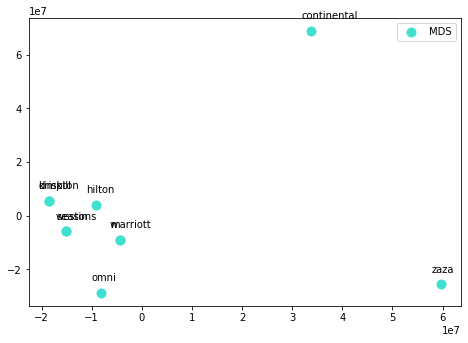

In [0]:
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from matplotlib.font_manager import FontProperties

seed = 6
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(1/mds_data).embedding_
plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

font0 = FontProperties()
font = font0.copy()
for label, x, y in zip(brand, pos[:, 0], pos[:, 1]):
    plt.annotate(label,xy = (x, y), xytext = (-10, 10),
    fontproperties=font,textcoords = 'offset points', ha = 'left', va = 'bottom')

# neg brand lift ??

In [0]:
brand = ['seasons','hilton','zaza','continental','marriott','kimpton','omni','driskill','westin','w']
brand_lift=np.zeros((10,10))
for x in range(len(brand)):
    for y in range(len(brand)):
        if x == y:
            brand_lift[x][y] = 1
        else:
            brand_lift[x][y] = (lift(brand[x],brand[y],len(neg_rev),neg_rev))

In [0]:
lift_brand = pd.DataFrame(brand_lift)
lift_brand.columns = brand
lift_brand.index = brand
lift_brand

,seasons,hilton,zaza,continental,marriott,kimpton,omni,driskill,westin,w
seasons,1.000000,0.0,0.000000,0.0,1.400000,0.0,0.000000,0.0,1.400000,1.555556
hilton,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
zaza,0.000000,0.0,1.000000,0.0,9.800000,0.0,10.315789,0.0,0.000000,10.888889
continental,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
marriott,1.400000,0.0,9.800000,0.0,1.000000,0.0,2.063158,0.0,3.920000,6.533333
kimpton,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000
omni,0.000000,0.0,10.315789,0.0,2.063158,0.0,1.000000,0.0,2.063158,1.146199
driskill,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000
westin,1.400000,0.0,0.000000,0.0,3.920000,0.0,2.063158,0.0,1.000000,0.000000
w,1.555556,0.0,10.888889,0.0,6.533333,0.0,1.146199,0.0,0.000000,1.000000


In [0]:
mds_data = brand_lift.copy()
for i in range(len(brand_lift)):
  for j in range(len(brand_lift[i])):
    if brand_lift[i][j]==0:
      mds_data[i][j] = 0.00000001
    else:
      mds_data[i][j] = brand_lift[i][j]

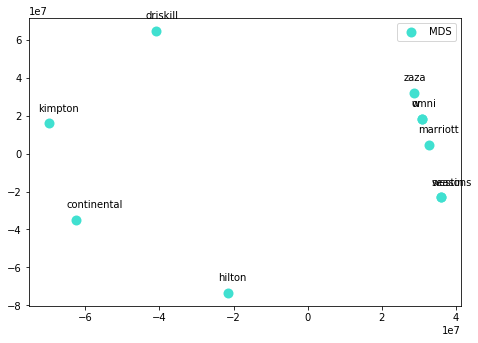

In [0]:
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from matplotlib.font_manager import FontProperties

seed = 6
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(1/mds_data).embedding_
plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

font0 = FontProperties()
font = font0.copy()
for label, x, y in zip(brand, pos[:, 0], pos[:, 1]):
    plt.annotate(label,xy = (x, y), xytext = (-10, 10),
    fontproperties=font,textcoords = 'offset points', ha = 'left', va = 'bottom')

# Attributes Lift
挑词，放进去 OK


In [0]:
# staff, location, bar, pool, service, food, resturant 

In [0]:
att = []
att_lift=np.zeros((len(brand),len(att)))
for x in range(len(brand)):
    for y in range(len(att)):
        if x == y:
            att_lift[x][y] = 1
        else:
            att_lift[x][y] = (lift(brand[x],att[y],len(pos_rev),pos_rev))
lift_att = pd.DataFrame(att_lift)
lift_att.columns = brand
lift_att.index = brand
lift_att

# Bi/tri gram


In [0]:
from nltk import word_tokenize
from nltk.util import ngrams 
from collections import Counter
nltk.download('punkt') 
for i in pos_rev:
  token = nltk.word_tokenize(i)
  bigrams = ngrams(token,2)
  trigrams = ngrams(token,3)
  print(Counter(trigrams))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Counter({('service', 'rooms', 'common'): 1, ('rooms', 'common', 'spaces'): 1, ('common', 'spaces', 'excellent'): 1, ('spaces', 'excellent', 'annual'): 1, ('excellent', 'annual', 'work'): 1, ('annual', 'work', 'event'): 1, ('work', 'event', 'staff'): 1, ('event', 'staff', 'accommodations'): 1, ('staff', 'accommodations', 'always'): 1, ('accommodations', 'always', 'top'): 1, ('always', 'top', 'notch'): 1, ('top', 'notch', 'course'): 1, ('notch', 'course', 'everything'): 1, ('course', 'everything', 'pricey'): 1, ('everything', 'pricey', 'including'): 1, ('pricey', 'including', 'parking'): 1, ('including', 'parking', 'clocks'): 1, ('parking', 'clocks', 'around'): 1, ('clocks', 'around', '40'): 1, ('around', '40', 'maybe'): 1, ('40', 'maybe', '45'): 1})
Counter({('great', 'place', 'stay'): 1, ('place', 'stay', 'great'): 1, ('stay', 'great', 'facility'): 1, ('great', 'facility', 'fr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

